In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("coin_XRP.csv")

In [ ]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,XRP,XRP,2013-08-05 23:59:59,0.005980,0.005613,0.005875,0.005613,0.0,4.387916e+07
1,2,XRP,XRP,2013-08-06 23:59:59,0.005661,0.004629,0.005637,0.004680,0.0,3.659101e+07
2,3,XRP,XRP,2013-08-07 23:59:59,0.004682,0.004333,0.004669,0.004417,0.0,3.453412e+07
3,4,XRP,XRP,2013-08-08 23:59:59,0.004424,0.004175,0.004397,0.004254,0.0,3.325863e+07
4,5,XRP,XRP,2013-08-09 23:59:59,0.004367,0.004253,0.004257,0.004291,0.0,3.354750e+07


In [ ]:
cols = [3,7]
df = df[df.columns[cols]]
df.columns = ['Date','Close']
df.rename(columns={"Date": "ds", "Close": "y"},inplace=True)
df.head()

,ds,y
0,2013-08-05 23:59:59,0.005613
1,2013-08-06 23:59:59,0.004680
2,2013-08-07 23:59:59,0.004417
3,2013-08-08 23:59:59,0.004254
4,2013-08-09 23:59:59,0.004291


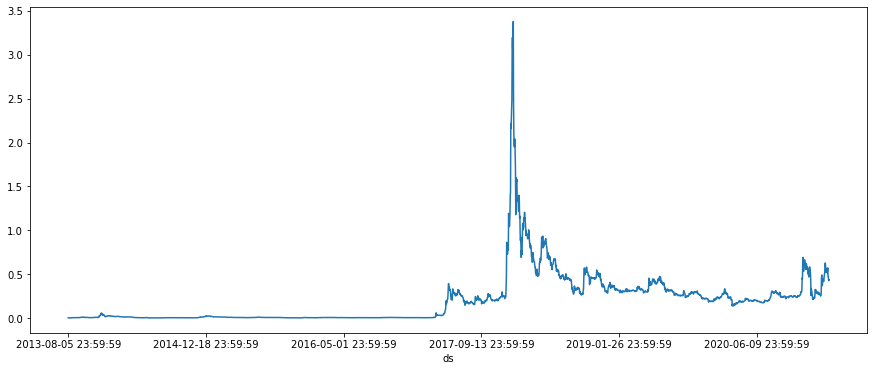

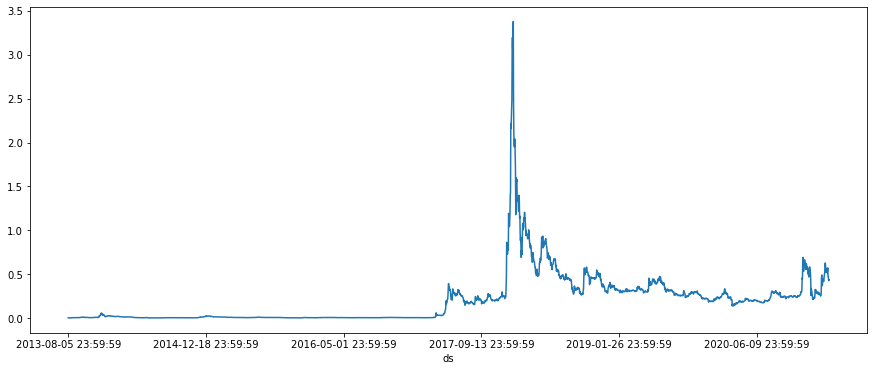

In [ ]:
pd.plotting.register_matplotlib_converters()
plt.figure(figsize=(15,6))
df.set_index('ds').y.plot().figure

In [ ]:
from fbprophet import Prophet

In [ ]:
m = Prophet(daily_seasonality=True,seasonality_mode='multiplicative')
m.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)
m.fit(df)

In [ ]:
future = m.make_future_dataframe(periods=12, freq ='MS')
future.tail()

,ds
2771,2021-10-01 23:59:59
2772,2021-11-01 23:59:59
2773,2021-12-01 23:59:59
2774,2022-01-01 23:59:59
2775,2022-02-01 23:59:59


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2013-08-05 23:59:59,0.008127,-0.120078,0.132877
1,2013-08-06 23:59:59,0.008018,-0.124232,0.138387
2,2013-08-07 23:59:59,0.008187,-0.125067,0.139936
3,2013-08-08 23:59:59,0.008430,-0.112733,0.138231
4,2013-08-09 23:59:59,0.008623,-0.122423,0.132112


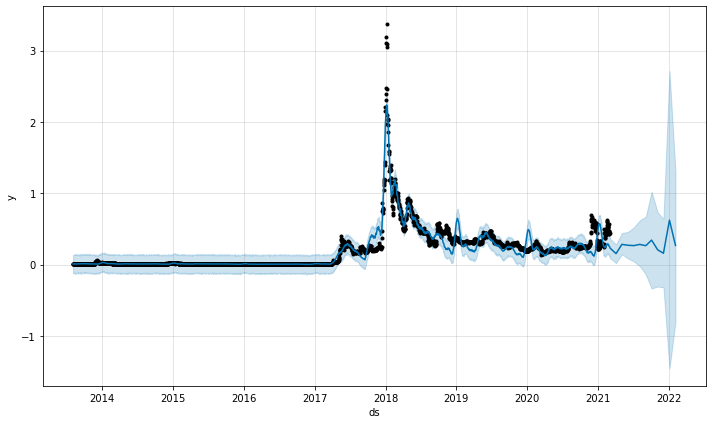

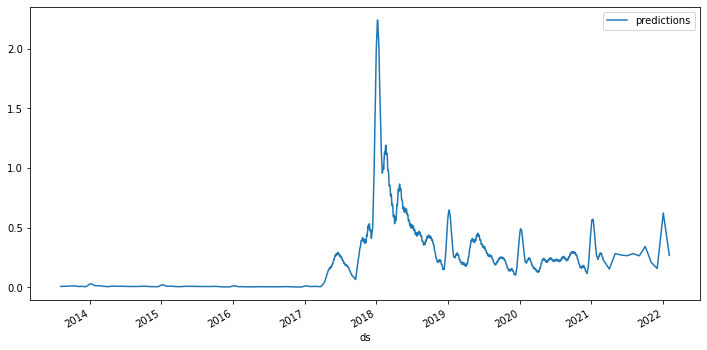

In [ ]:
fig1 = m.plot(forecast)
forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,6))

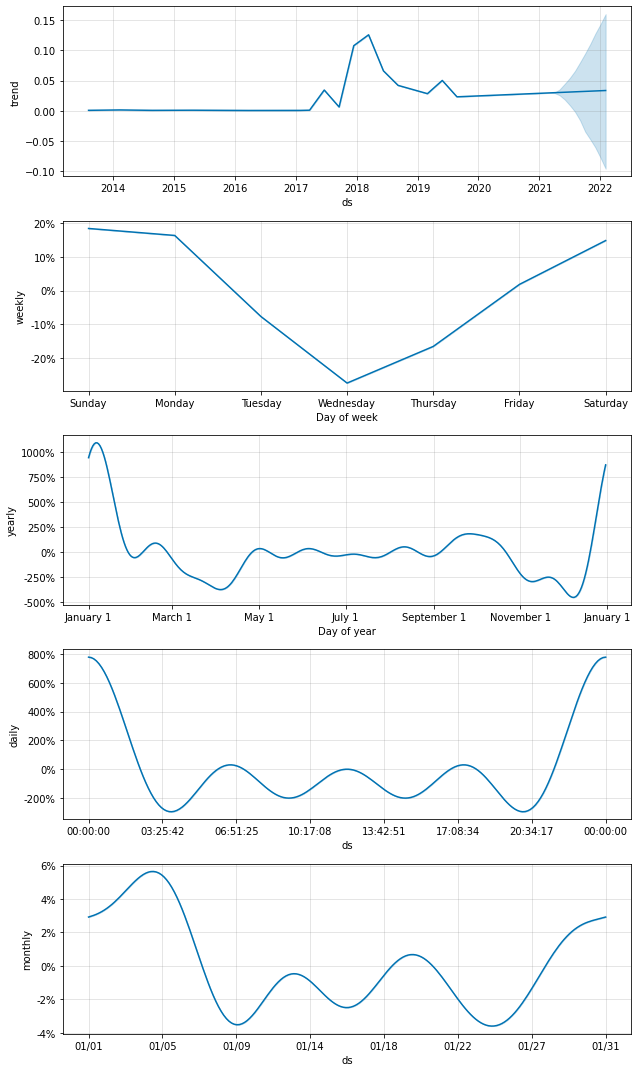

In [ ]:
fig2 = m.plot_components(forecast)